In [1]:
!pip install scikit-learn

**EDA**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np


In [3]:
df = pd.read_csv('IRIS.csv')
df.shape

(150, 5)

In [4]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Our dataset contains 5 columns including the target one

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Fortunatly, we don't have any null values.

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='species', ylabel='count'>

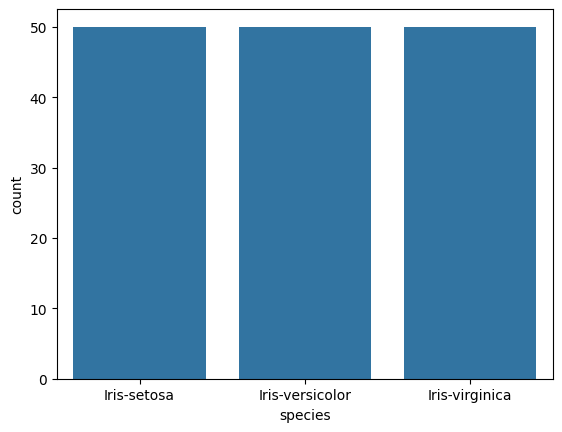

In [7]:
sns.countplot(x = df.species)

We have an equal distirbution of different species

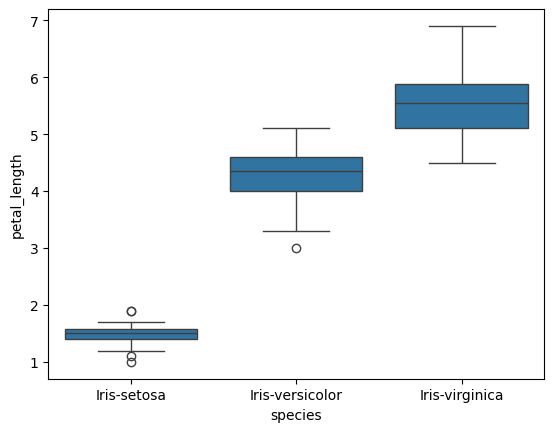

In [8]:
sns.boxplot(x="species",y="petal_length",data=df)
plt.show()

The petal length plays a great role in distinguishing species

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

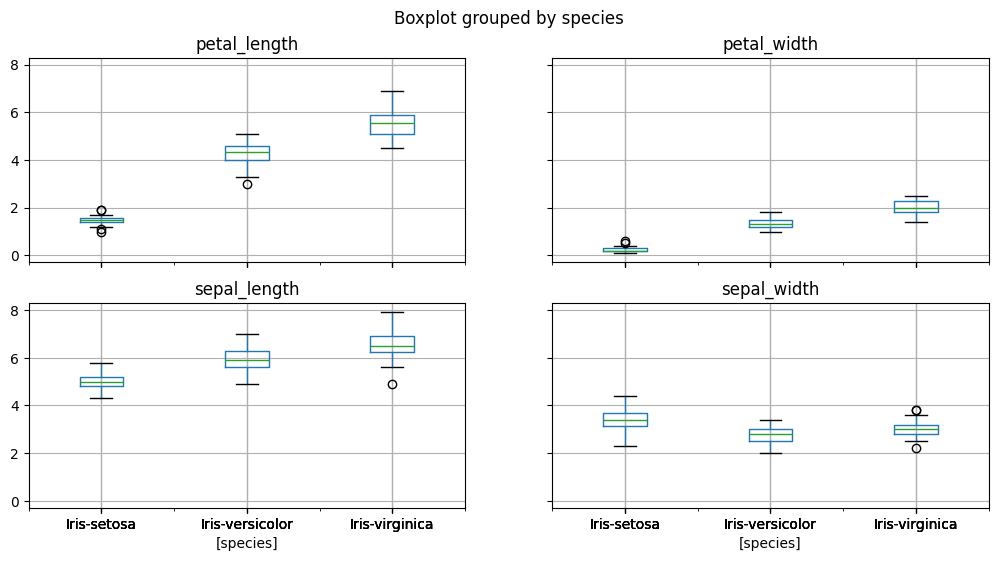

In [9]:
df.boxplot(by="species", figsize=(12, 6))

We may not need the sepal_width column 

**Data cleaning**

In [10]:
#checking for dublicates 
print(df.duplicated().sum())

3


In [11]:
#droping duplicates
df_clean = df.drop_duplicates(keep='last')

In [12]:
# Function to remove outliers based on IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

columns_to_check = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_clean = remove_outliers(df_clean, columns_to_check)
df_clean.shape

(143, 5)

We removed 2 outliers

**Modeling**

Random forest

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [15]:
# Encode species labels
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

# Separate features and target
X = df.drop(columns=['species'])
y = df['species']


Train test split

In [18]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=42)

Testing

In [19]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



**Saving model**

In [ ]:
import pickle

# Save the trained model to a file
with open('iris_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the model from the file
with open('iris_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Example: Predict on new data using the loaded model
new_data = [[5.0, 3.4, 1.5, 0.2]]  # New measurement
predicted_species = loaded_model.predict(new_data)
predicted_species_name = label_encoder.inverse_transform(predicted_species)

print("Predicted Species:", predicted_species_name[0])

**Saving the encoder**

In [ ]:
# Save the label encoder
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

In [4]:
import pkg_resources

def update_requirements_with_versions(requirements_file):
    updated_lines = []

    with open(requirements_file, "r") as file:
        for line in file:
            # Strip any whitespace and ignore comments or empty lines
            line = line.strip()
            if not line or line.startswith("#"):
                updated_lines.append(line)
                continue

            # Get the package name without any specified version
            package_name = line.split("==")[0]

            try:
                # Get the installed package version
                version = pkg_resources.get_distribution(package_name).version
                # Append the package with the updated version
                updated_lines.append(f"{package_name}=={version}")
            except pkg_resources.DistributionNotFound:
                print(f"{package_name} is not installed. Adding it without a version.")
                # Add the package name without a version if it's not installed
                updated_lines.append(package_name)

    # Write the updated lines back to the requirements file
    with open(requirements_file, "w") as file:
        for line in updated_lines:
            file.write(line + "\n")

    print("Requirements file has been updated with package versions.")

# Usage
update_requirements_with_versions("requirements.txt")


pickle is not installed. Adding it without a version.
Requirements file has been updated with package versions.


In [7]:
import pickle

In [10]:
%pip show pickle

Note: you may need to restart the kernel to use updated packages.
